In [1]:
# Import Packages
import numpy as np
import pandas as pd

In [2]:
# Import data
df = pd.read_csv('StudentsPerformance.csv')
print(df.head())
df.info()

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
ra

In [3]:
# Separate data into numeric and categorical dataframes 
cols = ['math score', 'reading score', 'writing score']
numeric = df[cols]
categorical = df.drop(cols, axis = 1)

print(numeric.head())
print(categorical.head())

   math score  reading score  writing score
0          72             72             74
1          69             90             88
2          90             95             93
3          47             57             44
4          76             78             75
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  
0                    none  
1               completed  
2                    none  
3                    none  
4                    none  


In [4]:
# Install a seaborn package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install seaborn

In [5]:
# Plot correlation 
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

<Figure size 750x750 with 12 Axes>

In [6]:
# Scale the numeric data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric)

In [7]:
# Instantiate and fit the PCA model
from sklearn.decomposition import PCA

pca = PCA()
pc = pca.fit_transform(scaled_df)
pc_df = pd.DataFrame(pc, columns = ['PC1', 'PC2', 'PC3'])

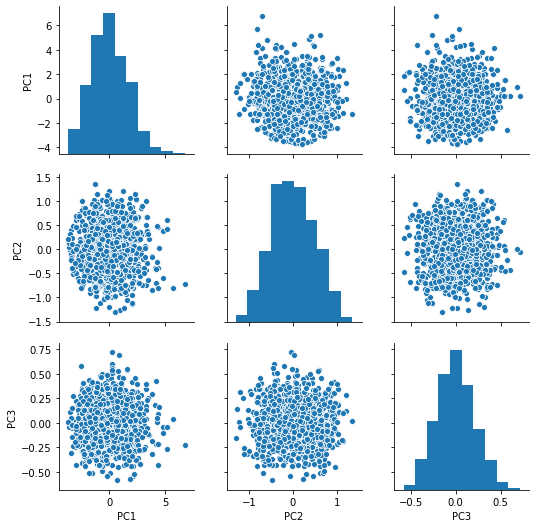

In [8]:
# Observe pairplot of Principle Components
sns.pairplot(pc_df)
plt.show()

In [9]:
# Add 1st and 2nd PCs to the categorical data
categorical['PC1'] = pc[:,0]
categorical['PC2'] = pc[:,1]
categorical['PC3'] = pc[:,2]

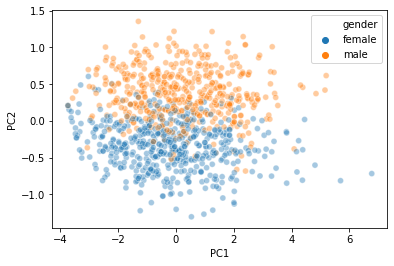

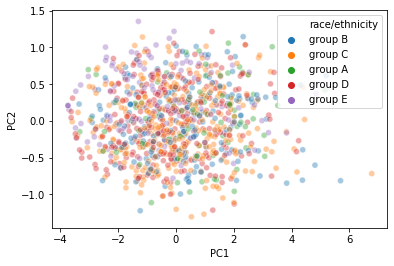

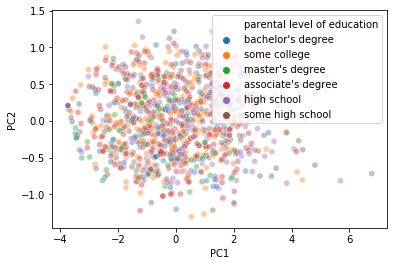

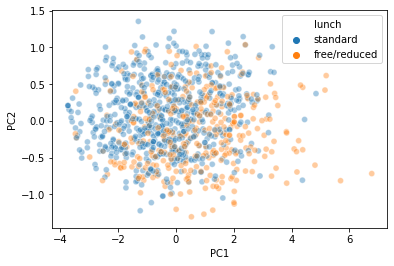

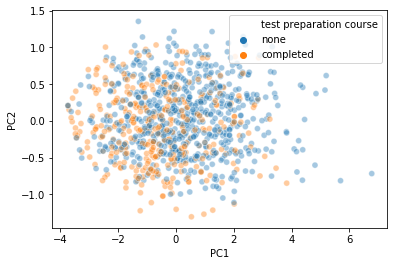

In [10]:
# Plot PCs and color by categories to observe clusters
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for cat in cat_cols:
    sns.scatterplot(data = categorical, x='PC1', y='PC2', hue=categorical[cat], alpha=0.4)
    plt.show()

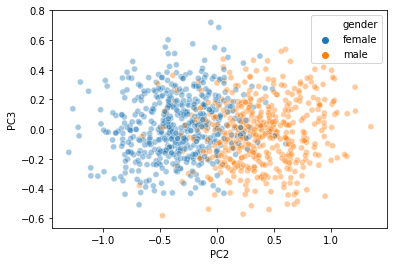

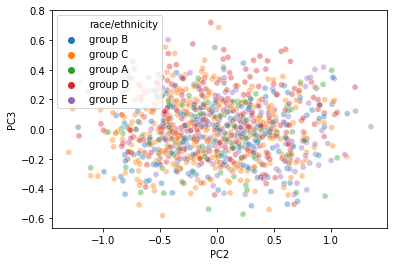

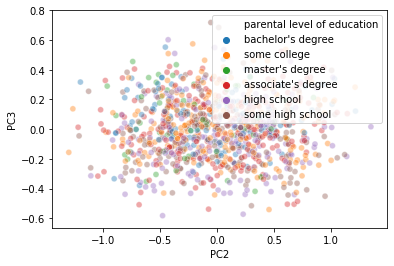

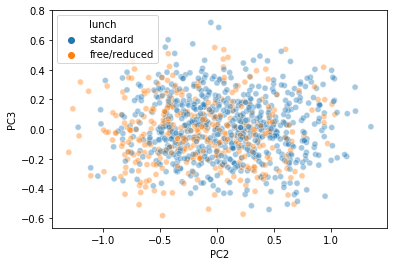

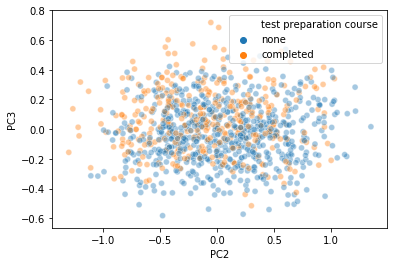

In [11]:
# Plot the 2nd and 3rd components and observe any relationships 
for cat in cat_cols:
    sns.scatterplot(data = categorical, x='PC2', y='PC3', hue=categorical[cat], alpha=0.4)
    plt.show()

In [12]:
# Create dataframes of gender and scores
gender = df.loc[:,'gender']
gender = pd.DataFrame(gender)
scores = df.loc[:, cols]
scores = pd.DataFrame(scores)
gender_df = pd.concat([gender,scores], axis = 1)
male = df[df['gender'] == 'male']
female = df[df['gender'] == 'female']

print(male.mean())
print(female.mean())

math score       68.728216
reading score    65.473029
writing score    63.311203
dtype: float64
math score       63.633205
reading score    72.608108
writing score    72.467181
dtype: float64


In [13]:
# Plot scores and gender
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2)

fig1 = go.Figure()
fig1.add_trace(go.Histogram(x=male['writing score'], name = 'male', histnorm='probability density'))
fig1.add_trace(go.Histogram(x=female['writing score'], name = 'female', histnorm='probability density'))

# Overlay both histograms
fig1.update_layout(barmode='overlay',
                    title_text='Writing Score', # title of plot
                    xaxis_title_text='Score', # xaxis label
                    yaxis_title_text='Probability', # yaxis label
                  )
                   
# Reduce opacity to see both histograms
fig1.update_traces(opacity=0.75)
fig1.show()

fig2 = go.Figure()
fig2.add_trace(go.Histogram(x=male['reading score'], name = 'male', histnorm='probability density'))
fig2.add_trace(go.Histogram(x=female['reading score'], name = 'female', histnorm='probability density'))

# Overlay both histograms
fig2.update_layout(barmode='overlay',
                    title_text='Reading Score', # title of plot
                    xaxis_title_text='Score', # xaxis label
                    yaxis_title_text='Probability', # yaxis label
                  )
                   
# Reduce opacity to see both histograms
fig2.update_traces(opacity=0.75)
fig2.show()

fig3 = go.Figure()
fig3.add_trace(go.Histogram(x=male['math score'], name = 'male', histnorm='probability density'))
fig3.add_trace(go.Histogram(x=female['math score'], name = 'female', histnorm='probability density'))

# Overlay both histograms
fig3.update_layout(barmode='overlay',
                    title_text='Math Score', # title of plot
                    xaxis_title_text='Score', # xaxis label
                    yaxis_title_text='Probability', # yaxis label
                  )
# Reduce opacity to see both histograms
fig3.update_traces(opacity=0.75)
fig3.show()
